In [29]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from sklearn.metrics import classification_report, confusion_matrix # <- defineevaluation metrics

In [31]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'
# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)


['test', 'chest_xray', 'train', 'val', '__MACOSX']
1341
normal picture title:  NORMAL2-IM-0696-0001.jpeg
pneumonia picture title: person51_bacteria_245.jpeg


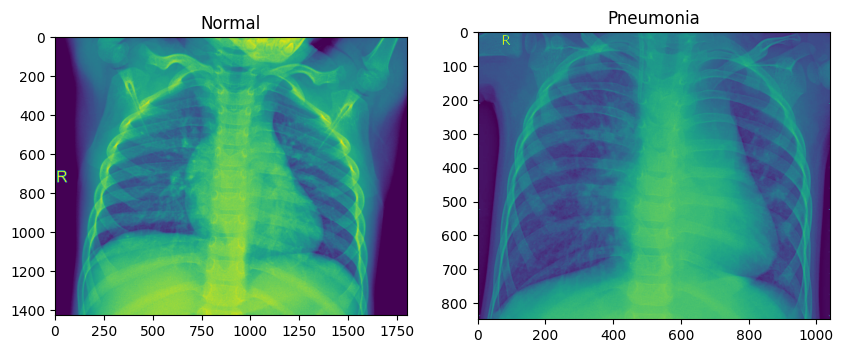

In [32]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

In [33]:
#cnn = Sequential()
#Convolution
model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)
# Fully Connected Layers
model = Dense(activation = 'relu', units = 128) (model)
model = Dense(activation = 'sigmoid', units = 1)(model)
# Compile the Neural network
model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])


In [34]:
num_of_test_samples = 600
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as
# your CNN is getting ready to process that image
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #Image normalization.
training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [35]:
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/',
                                                        target_size=(64, 64),
                                                        batch_size=32,class_mode='binary')
test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,class_mode = 'binary')
model_fin.summary()

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,121 (6.00 MB)

 Trainable params: 1,573,121 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
cnn_model = model_fin.fit(training_set,steps_per_epoch = 163,
                          epochs = 10,
                          validation_data = validation_generator,validation_steps = 624)

test_accu = model_fin.evaluate(test_set,steps=624)
model_fin.save('medical_ann.h5')
print('The testing accuracy is :',test_accu[1]*100, '%')

Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9168 - loss: 0.2023 - val_accuracy: 0.8125 - val_loss: 0.4465
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4465
Epoch 3/10


2024-05-29 16:39:37.299378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:39:37.306659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:39:37.379466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9210 - loss: 0.1857 - val_accuracy: 0.8125 - val_loss: 0.5248
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5248
Epoch 5/10


2024-05-29 16:39:59.862163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:39:59.868721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:39:59.943658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.9163 - loss: 0.2132 - val_accuracy: 0.6250 - val_loss: 0.4081
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.4081
Epoch 7/10


2024-05-29 16:40:22.473534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:40:22.480390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:40:22.554543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9106 - loss: 0.2170 - val_accuracy: 0.8125 - val_loss: 0.4099
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4099
Epoch 9/10


2024-05-29 16:40:45.027841: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:40:45.034777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:40:45.108907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.9173 - loss: 0.2073 - val_accuracy: 0.7500 - val_loss: 0.4971
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4971


2024-05-29 16:41:07.497620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:41:07.503766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:41:07.581370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8126 - loss: 0.4315  


2024-05-29 16:41:09.700901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The testing accuracy is : 81.25 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step


0

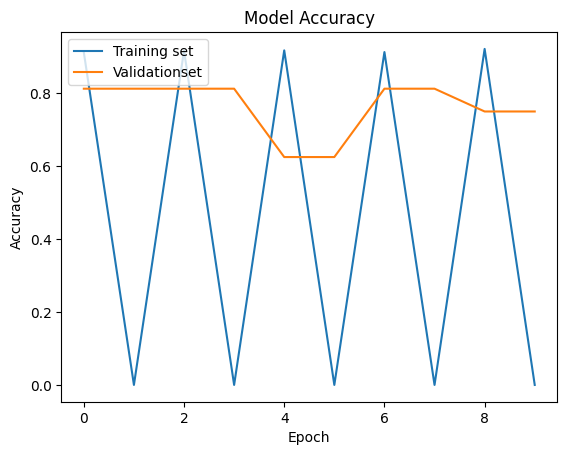

<Figure size 640x480 with 0 Axes>

In [49]:
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validationset'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

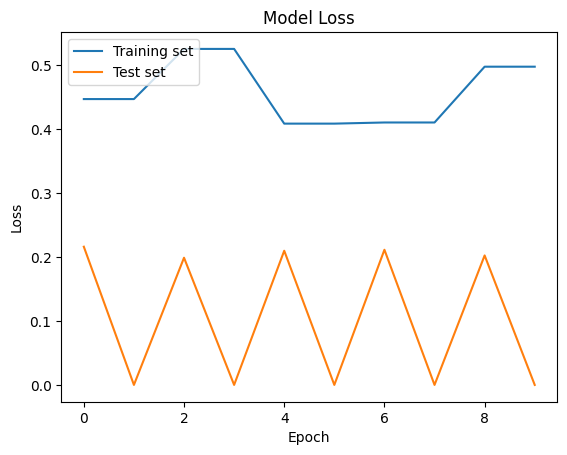

<Figure size 640x480 with 0 Axes>

In [50]:
# Loss
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()